In [9]:
using Revise
using SSMC, SSMC.BasicMiCRM, SSMC.MLSolver

In [10]:
using CairoMakie, ProgressLogging

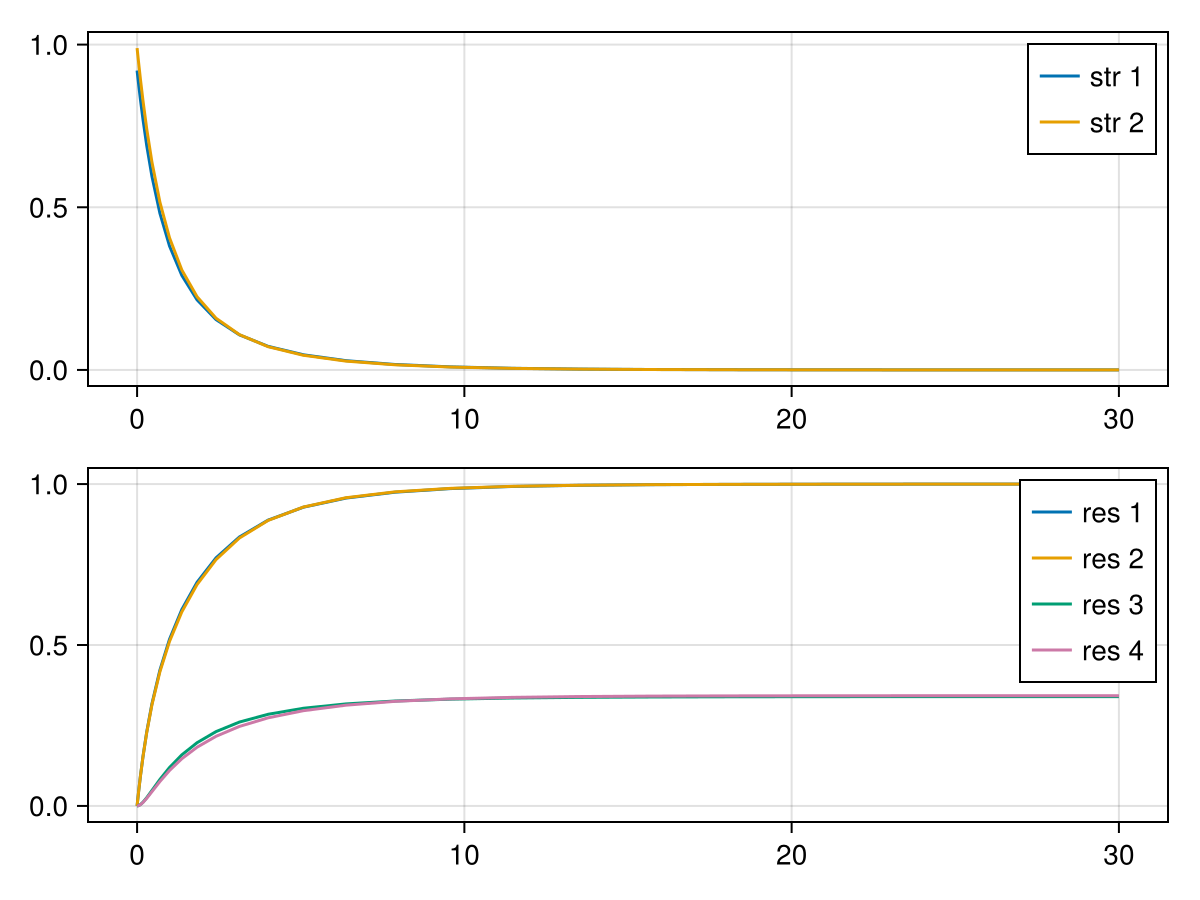

2×4 SMatrix{2, 4, Float64, 8} with indices SOneTo(2)×SOneTo(4):
 1.0  0.0  2.0  0.0
 0.0  1.0  0.0  2.0

4×4 SMatrix{4, 4, Float64, 16} with indices SOneTo(4)×SOneTo(4):
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0

6-element Vector{Float64}:
 1.272602296845063e-5
 1.3384853330884648e-5
 0.9999812409228129
 0.9999804272108261
 0.33963818748361824
 0.34245541124995277

In [11]:
p, s = make_solve_plot_return(2,4,30;
    D=[0. 0. 0. 0.; 0. 0. 0. 0.; 0. 1. 0. 0.; 1. 0. 0. 0.],
    K=[1., 1., 0., 0.],
    r=[1., 1., 0., 0.],
    l=[1., 1., 0., 0.],
    c=[1.0 0. 2. 0.; 0. 1. 0. 2.],
    m=[1., 1.],
    u0=[1.,1.,0.,0.,0.,0.],
    u0rand=0.1
)
display(p.p.c)
display(p.p.D)
display(s.u[end])

In [13]:
symbolic_solve_ode_ml(p)

┌ Warning: Solve::ratnz: Solve was unable to solve the system with inexact coefficients.
│     The answer was obtained by solving a corresponding exact system and
│     numericizing the result.
└ @ MathLink ~/.julia/packages/MathLink/IeHCk/src/eval.jl:16
┌ Warning: Solve::svars: Equations may not give solutions for all "solve" variables.
└ @ MathLink ~/.julia/packages/MathLink/IeHCk/src/eval.jl:16


4-element Vector{Vector{Pair{Symbolics.Num, Symbolics.Num}}}:
 [u1 => 0.0, u2 => 0.0, u3 => 1.0, u4 => 1.0]
 [u1 => 0.0, u2 => 0.0, u3 => 1.0, u4 => 1.0, u6 => 0.5]
 [u1 => 0.0, u2 => 0.0, u3 => 1.0, u4 => 1.0, u5 => 0.5]
 [u1 => 0.0, u2 => 0.0, u3 => 1.0, u4 => 1.0, u5 => 0.5, u6 => 0.5]

In [5]:
sssol = solve(SteadyStateProblem(p), DynamicSS(); reltol=1e-10)

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase ~/.julia/packages/SciMLBase/sYmAV/src/integrator_interface.jl:589


retcode: Failure
u: 6-element Vector{Float64}:
 0.0
 0.0
 1.0
 1.0
 0.3568917300080132
 0.35769463266393414

In [6]:
sssol = solve(SteadyStateProblem(p), SSRootfind(GaussNewton()); abstol=1e-18)

retcode: Success
u: 6-element Vector{Float64}:
 7.215602314365661e-15
 7.215602314365661e-15
 0.9999999999999928
 0.9999999999999928
 0.4999999999999964
 0.49999999999999634

In [7]:
uninplace(micrmfunc!)(sssol.u, p.p, 0)

6-element Vector{Float64}:
 -5.207103086865761e-29
 -5.287212365125234e-29
  8.473456979080914e-19
  8.473456979080914e-19
  0.0
  1.5777218104420236e-30

maximum(real(lambdas)) = 1.530505860639703e-12


[ Info: we are getting non-zero imaginary parts, max is 0.000000


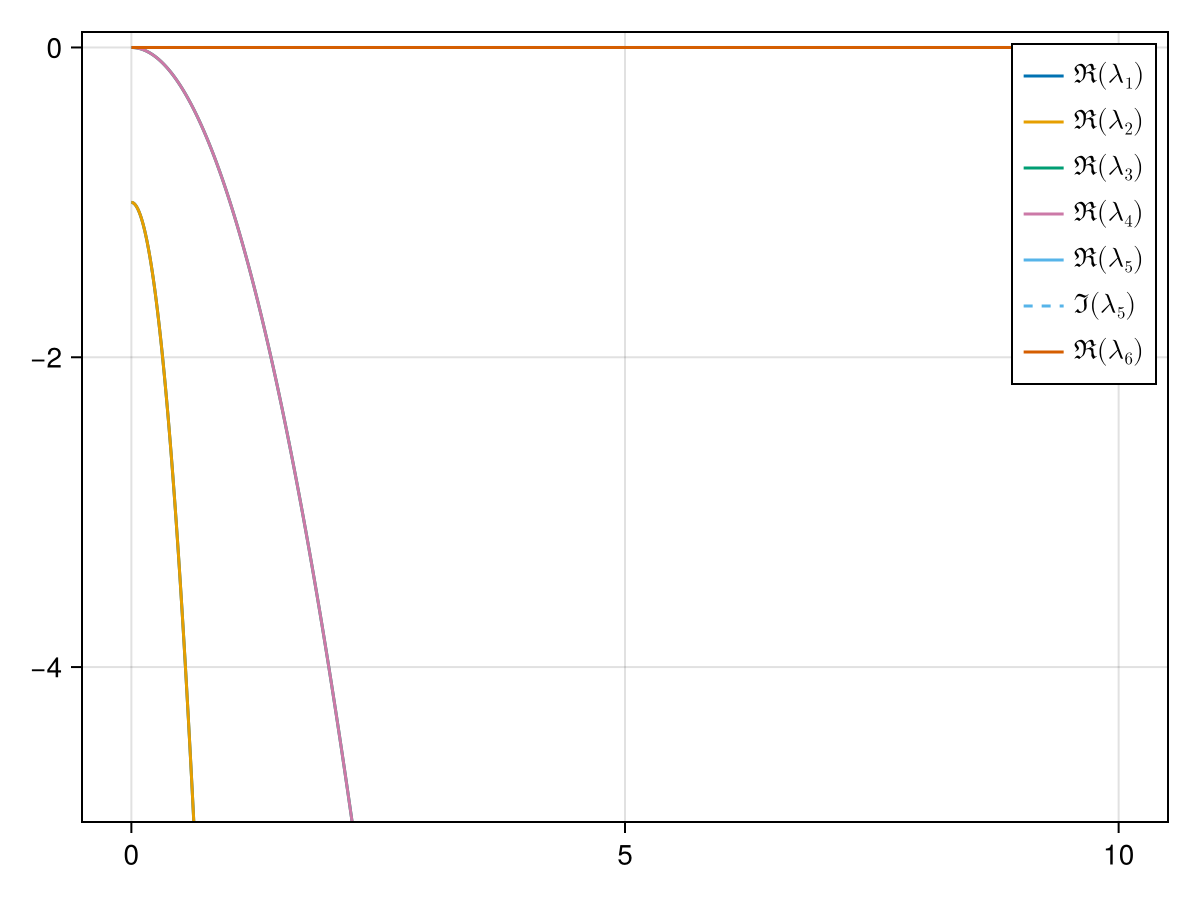

In [8]:
ks = LinRange(0., 10., 10000)
lambdas = do_linstab_for_ks(ks, p, [0., 0., 10., 10., 1., 1.], sssol.u);
@show maximum(real(lambdas))
faa = plot_linstab_lambdas(ks, lambdas)
ylims!(faa.axis, (-5.0, 0.1))
faa